Shoping Habits Project - Sude Karaahmet

Hypothesis

Null Hypothesis (H₀):
Food purchases do not make up a significant portion of monthly spending.

Alternative Hypothesis (H₁):
Food purchases make up a significant portion of monthly spending.


Creating the Data Frame

• The data frame is created from the ekstrekesidi.xlsx document that I imported from my QNB Mobile app, which has my credit card statements from the months october, november, december. 

• Because I was dealing with personal data, to provide some privacy for myself, I preprocessed the data by changing the business names to general names from the six groups: food, cosmetics, clothing, transportation and other.




In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def calculate_monthly_expenses(data):
    results = {}

    # Extract year and month from the date
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month

    # Group by year and month
    for (year, month), group in data.groupby(['Year', 'Month']):
        # Find the highest spending day
        daily_totals = group.groupby('Date')['Cost'].sum().reset_index()
        
        # Count the number of purchases per day
        daily_purchases = group.groupby('Date').size().reset_index(name='Purchases')

        # Find the highest day spent
        highest_day_row = daily_totals.loc[daily_totals['Cost'].idxmax()]
        highest_day = highest_day_row['Date'].strftime('%d/%m/%Y')
        highest_day_spent = highest_day_row['Cost']

        # Sum totals for all categories
        category_totals = group.groupby('Category')['Cost'].sum().reset_index()

        # Store the results
        results[(year, month)] = {
            'highest_day': highest_day,
            'highest_day_spent': highest_day_spent,
            'category_totals': category_totals,
            'daily_totals': daily_totals,
            'daily_purchases': daily_purchases  
        }

    return results


def plot_monthly_spending(results):
    
    for (year, month), result in results.items():
        daily_totals = result['daily_totals']

        # Extract only the day of the month
        daily_totals['Day'] = daily_totals['Date'].dt.day

        # Find the day with the most money spent
        highest_spending_day = daily_totals.loc[daily_totals['Cost'].idxmax()]
        highest_spending_day_str = highest_spending_day['Date'].strftime('%d/%m/%Y')
        highest_spending_amount = highest_spending_day['Cost']


        
        

        custom_color = ['#F08080']

        # For the graph   
        plt.figure(figsize=(5, 3))  # Smaller size for better fit
        plt.bar(daily_totals['Day'], daily_totals['Cost'], color = custom_color,  label=f'{year}-{month:02d}', linewidth=1)
        plt.title(f'Daily Spending for {year}-{month:02d}')
        plt.xlabel('Day of the Month')
        plt.ylabel('Spending')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Print the day with the most money spent
        print(f"\nFor {year}-{month:02d}, the day with the most money spent was {highest_spending_day_str} with an amount of {highest_spending_amount:.2f}.\n")




def plot_category_percentage(results):
    # Define a palette with distinct tones of blue
    custom_colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43']

    for (year, month), result in results.items():
        category_totals = result['category_totals']

        # Data for the bar chart
        categories = category_totals['Category']
        values = category_totals['Cost']
        percentages = (values / values.sum()) * 100

        # Find the category with the highest spending percentage
        max_percentage_idx = percentages.idxmax()
        highest_category = categories[max_percentage_idx]
        highest_percentage = percentages[max_percentage_idx]

        # Ensure enough colors are available for categories
        if len(categories) > len(custom_colors):
            # Extend the palette if necessary
            custom_colors.extend(['#004E8F', '#0055AA', '#0066CC'] * ((len(categories) // len(custom_colors)) + 1))

        # Plot the horizontal bar chart
        plt.figure(figsize=(6, 4))
        plt.barh(categories, percentages, color=custom_colors[:len(categories)], edgecolor='black')
        plt.xlabel('Percentage of Spending (%)')
        plt.ylabel('Categories')
        plt.title(f'Category Spending Percentage for {year}-{month:02d}')
        plt.gca().invert_yaxis()  # Optional: makes the highest bar appear at the top
        plt.tight_layout()
        plt.show()

        print(f"\nThe category with the highest percentage of spending for {year}-{month:02d} is '{highest_category}' with {highest_percentage:.1f}%.\n")



def plot_daily_purchases(results):
    
    for (year, month), result in results.items():
        daily_purchases = result['daily_purchases']
        
        # Find the maximum number of purchases in the month
        max_purchases = daily_purchases['Purchases'].max()
        
        # Find all days with the maximum number of purchases
        max_days = daily_purchases[daily_purchases['Purchases'] == max_purchases]
        
        # Format the days with the highest purchases
        max_days_str = ", ".join(max_days['Date'].dt.strftime('%d/%m/%Y'))
        
       
        # Extract only the day of the month for the x-axis
        daily_purchases['Day'] = daily_purchases['Date'].dt.day
        
        # Generate all days of the month (to handle missing days)
        all_days = pd.DataFrame({'Day': range(1, 32)})  
        all_days = all_days[all_days['Day'] <= daily_purchases['Day'].max()]  
        
        # Merge the daily purchases data days
        merged_data = pd.merge(all_days, daily_purchases[['Day', 'Purchases']], on='Day', how='left').fillna(0)

        # Plot the daily purchases graph
        plt.figure(figsize=(5, 3))
        plt.bar(merged_data['Day'], merged_data['Purchases'], color='pink', label=f'{year}-{month:02d}')
        plt.title(f"Daily Purchases in {year}-{month:02d}")
        plt.xlabel('Day of the Month')
        plt.ylabel('Number of Purchases')
        plt.xticks(rotation=0)  
        plt.grid(True)
        plt.tight_layout()
        plt.show()

         
        print(f"\nThe day(s) with the highest number of purchases in {year}-{month:02d} is/are {max_days_str} with {max_purchases} purchases.\n")
        

     


def main(file_path):
    # Skipping the first row
    data = pd.read_excel(file_path, skiprows=1, usecols=[0, 1, 2], names=['Date', 'Category', 'Cost'])

    # Convert the 'Date' column to the correct format
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

    
    results = calculate_monthly_expenses(data)

    return results


# Path for my excel file
file_path = 'ekstrekesidi.xlsx'

results = main(file_path)






Daily Spending Habits



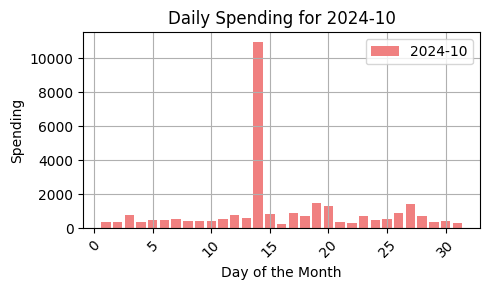


For 2024-10, the day with the most money spent was 14/10/2024 with an amount of 10959.18.



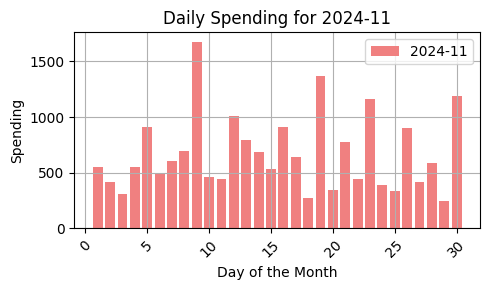


For 2024-11, the day with the most money spent was 09/11/2024 with an amount of 1677.49.



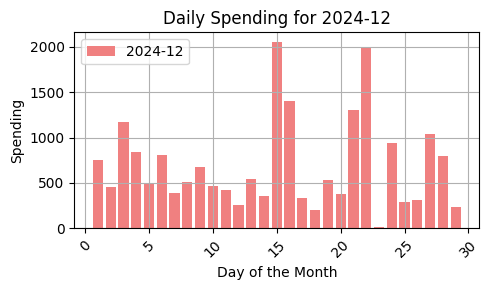


For 2024-12, the day with the most money spent was 15/12/2024 with an amount of 2055.56.



In [27]:
print("Daily Spending Habits\n")
plot_monthly_spending(results)

Daily Spending Habits Using Pie Chart



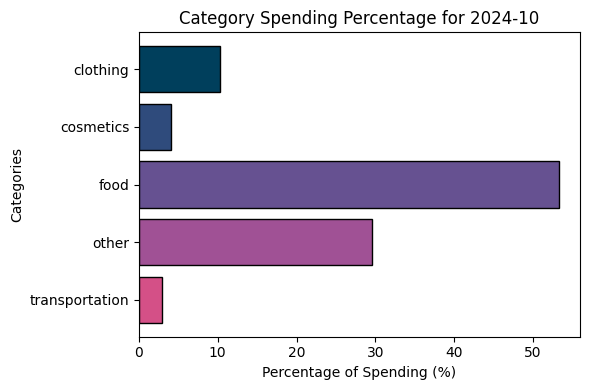


The category with the highest percentage of spending for 2024-10 is 'food' with 53.3%.



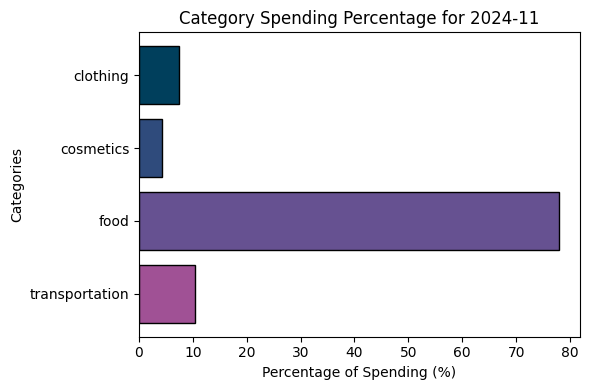


The category with the highest percentage of spending for 2024-11 is 'food' with 78.0%.



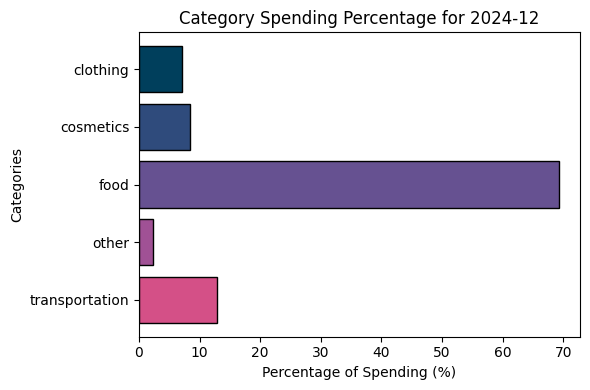


The category with the highest percentage of spending for 2024-12 is 'food' with 69.3%.



In [28]:
print("Daily Spending Habits Using Pie Chart\n")
plot_category_percentage(results)

Number Of Purchase In A Day



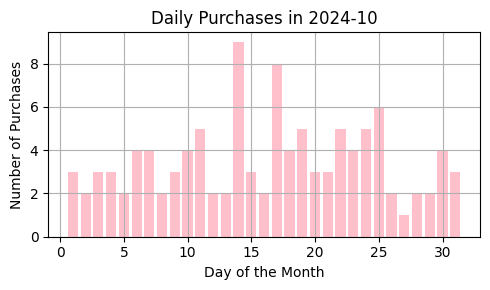


The day(s) with the highest number of purchases in 2024-10 is/are 14/10/2024 with 9 purchases.



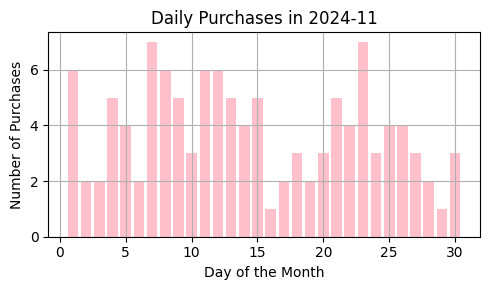


The day(s) with the highest number of purchases in 2024-11 is/are 07/11/2024, 23/11/2024 with 7 purchases.



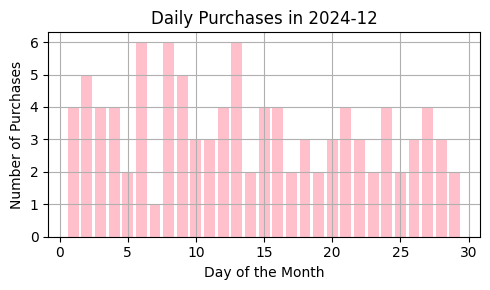


The day(s) with the highest number of purchases in 2024-12 is/are 06/12/2024, 08/12/2024, 13/12/2024 with 6 purchases.



In [29]:
print("Number Of Purchase In A Day\n")
plot_daily_purchases(results)

We can say that the 